# Libraries

In [1]:
import pandas as pd
import numpy as np

# Constants

In [2]:
SEED = 42

# Load the data

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# Analysis

In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
4208,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (4209, 378)
Test shape: (4209, 377)


# Feature encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
for column_name in train.columns[2:]:
    label_encoder = LabelEncoder() 
    
    train_column_values = list(train[column_name].values)
    test_column_values = list(test[column_name].values)
    
    label_encoder.fit(train_column_values + test_column_values)
    
    train[column_name] = label_encoder.transform(train_column_values)
    test[column_name] = label_encoder.transform(test_column_values)

In [9]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


# Feature engineering

In [10]:
from sklearn.decomposition import PCA, FastICA, LatentDirichletAllocation, RandomizedPCA, DictionaryLearning
from sklearn.decomposition import TruncatedSVD, ProjectedGradientNMF, FactorAnalysis, IncrementalPCA

from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

In [11]:
COMPONENT_NUM = 90

decompositions = [
    TruncatedSVD(n_components=COMPONENT_NUM, random_state=SEED),
    PCA(n_components=COMPONENT_NUM, random_state=SEED),
    FastICA(n_components=COMPONENT_NUM, random_state=SEED),
    FactorAnalysis(n_components=COMPONENT_NUM, random_state=SEED),
    GaussianRandomProjection(n_components=COMPONENT_NUM, eps=0.1, random_state=SEED),
    SparseRandomProjection(n_components=COMPONENT_NUM, dense_output=True, random_state=SEED),
    
    #DictionaryLearning(n_components=COMPONENT_NUM, n_jobs=8, random_state=SEED),
    #LatentDirichletAllocation(n_topics=COMPONENT_NUM, random_state=SEED)
    #ProjectedGradientNMF(n_components=COMPONENT_NUM, random_state=SEED),
]

decomp_names = ['tSVD', 'PCA', 'ICA', 'FA', 'GRP', 'SRP']

train_decomp_features = [decompositor.fit_transform(train.drop(["y"], axis=1)) for decompositor in decompositions]
test_decomp_features = [decompositor.transform(test) for decompositor in decompositions]

In [12]:
decomposition_features = []

for i in range(1, COMPONENT_NUM + 1):
    
    for feature_name, train_decomp_feature, test_decomp_feature in zip(
        decomp_names,
        train_decomp_features,
        test_decomp_features
    ):
    
        enumerated_feature_name = feature_name + '_' + str(i)
        train[enumerated_feature_name] = train_decomp_feature[:,i-1]
        test[enumerated_feature_name] = test_decomp_feature[:,i-1]
        
        decomposition_features.append(enumerated_feature_name)

In [13]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,ICA_89,FA_89,GRP_89,SRP_89,tSVD_90,PCA_90,ICA_90,FA_90,GRP_90,SRP_90
0,0,130.81,37,23,20,0,3,27,9,14,...,0.026768,1.382746e-08,1.991487,0.464477,0.102304,0.277541,0.031622,-2.001495e-09,-3.707266,0.928954
1,6,88.53,37,21,22,4,3,31,11,14,...,0.004606,1.228105e-01,-0.543723,0.464477,-0.279242,-0.154363,-0.015954,1.069540e+00,-3.486997,0.464477
2,7,76.26,24,24,38,2,3,30,9,23,...,0.010373,-1.553584e+00,3.553038,-0.928954,-0.254074,0.147111,0.030815,-9.515774e-01,-1.493414,0.928954
3,9,80.62,24,21,38,5,3,30,11,4,...,-0.009223,-1.650519e+00,3.709667,-0.928954,0.079814,0.142695,0.004134,-2.258156e-03,0.161911,0.464477
4,13,78.02,24,23,38,5,3,14,3,13,...,-0.005365,-9.475529e-01,3.702059,-0.928954,0.016953,0.290443,-0.002460,-3.659981e-01,-0.840418,0.000000


In [14]:
# #These features overfit (meh)

# categorical_features_num = 9
# for i in range(categorical_features_num):
#     if i == 7:
#         continue
    
#     new_feature_name = 'mean_x' + str(i)
#     select_feature_name = 'X' + str(i)
    
#     mean_feature = train[[select_feature_name, 'y']].groupby([select_feature_name], as_index=False).median()
#     mean_feature.columns = [select_feature_name, new_feature_name]
    
#     train = pd.merge(train, mean_feature, on=select_feature_name, how='outer')
    
#     test = pd.merge(test, mean_feature, on=select_feature_name, how='left')
#     test[new_feature_name].fillna(test[new_feature_name].dropna().median(), inplace=True)

In [15]:
important_features = ['X0','X5', 'X6', 'X8', 'X29', 'X47', 'X115', 'X118', 'X127', 'X314', 'X315']

transformations = {
    'abs': lambda x: abs(x),
    'squared': lambda x: x**2,
    'log': lambda x: np.log(x) if x > 1 else 0,
    'sqrt': lambda x: np.sqrt(x) if x > 0 else 0,
    'not_0': lambda x: 1 if x != 0 else 0,
    'bool_1': lambda x: 1 if x > 8 else 0,
    'bool_2': lambda x: 1 if x > 16 else 0,
    'bool_3': lambda x: 1 if x > 27 else 0,
}

added_features = []

for important_feature in important_features:
    for name, func in transformations.items():
        
        feature_name = important_feature + '_' + name
        train[feature_name] = train[important_feature].apply(func)
        test[feature_name] = train[important_feature].apply(func)
        
        added_features.append(feature_name)
        
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X314_abs,X314_bool_1,X315_sqrt,X315_not_0,X315_bool_2,X315_bool_3,X315_log,X315_squared,X315_abs,X315_bool_1
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,0.0,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,0,0,0.0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0.0,0,0,0,0,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0.0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0.0,0,0,0,0,0,0,0


In [16]:
import itertools

important_features = ['X0','X5', 'X6', 'X8', 'X29', 'X47', 'X115', 'X118', 'X127', 'X314', 'X315']

transformations = {
    '_mul_': lambda x,y: x * y,
    '_div_': lambda x,y: x / (y + 3.123e-3),
    '_abs_': lambda x,y: abs(x - y),
}

for feature_combination in itertools.combinations(important_features, 2):
    for operation_name, operation_func in transformations.items():
        feature_name = operation_name.join(feature_combination)
    
        train[feature_name] = operation_func(train[feature_combination[0]], train[feature_combination[1]])
        test[feature_name] = operation_func(test[feature_combination[0]], test[feature_combination[1]])
        
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X118_div_X315,X127_abs_X314,X127_mul_X314,X127_div_X314,X127_abs_X315,X127_mul_X315,X127_div_X315,X314_abs_X315,X314_mul_X315,X314_div_X315
0,0,130.81,37,23,20,0,3,27,9,14,...,320.204931,0,0,0.000000,0,0,0.000000,0,0,0.0
1,6,88.53,37,21,22,4,3,31,11,14,...,320.204931,1,0,320.204931,1,0,320.204931,0,0,0.0
2,7,76.26,24,24,38,2,3,30,9,23,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.0
3,9,80.62,24,21,38,5,3,30,11,4,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.0
4,13,78.02,24,23,38,5,3,14,3,13,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.0


# Target and features

In [17]:
target = 'y'

try:
    features = list(train.columns[2:]) + decomposition_features + [train.columns[0]]
except:
    features = list(train.columns[2:]) + [train.columns[0]]

# Deduplicate features
features = list(set(features))

In [18]:
print(features)

['PCA_47', 'FA_88', 'X157', 'X363', 'X346', 'X47_log', 'X68', 'X44', 'X159', 'ICA_68', 'SRP_72', 'X155', 'X330', 'FA_30', 'X115_bool_2', 'X0_mul_X6', 'X161', 'X65', 'X5_div_X314', 'PCA_56', 'X201', 'FA_79', 'X29_div_X47', 'X6_abs_X315', 'tSVD_21', 'X115_abs_X314', 'X8', 'PCA_54', 'X219', 'SRP_47', 'X6_div_X118', 'ICA_86', 'GRP_72', 'X29_abs', 'X280', 'X95', 'SRP_59', 'X0_div_X47', 'X5_div_X6', 'tSVD_64', 'X315_log', 'X367', 'X11', 'SRP_64', 'SRP_71', 'FA_86', 'tSVD_2', 'X5_div_X8', 'tSVD_83', 'SRP_28', 'FA_52', 'GRP_19', 'X8_bool_1', 'X115_mul_X315', 'X347', 'FA_10', 'SRP_55', 'X248', 'X254', 'tSVD_79', 'tSVD_90', 'tSVD_47', 'X318', 'X132', 'PCA_23', 'X250', 'GRP_88', 'X117', 'X165', 'X209', 'X21', 'X202', 'GRP_14', 'ICA_44', 'tSVD_66', 'PCA_46', 'ICA_88', 'X0_bool_3', 'X257', 'tSVD_27', 'GRP_67', 'X238', 'X6_sqrt', 'X0_bool_2', 'X33', 'ICA_90', 'PCA_50', 'ICA_51', 'SRP_57', 'X38', 'tSVD_30', 'X5_bool_1', 'X276', 'SRP_14', 'tSVD_81', 'tSVD_68', 'X315', 'X326', 'PCA_86', 'GRP_41', 'SRP_

# Outlier detection and removal

In [19]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

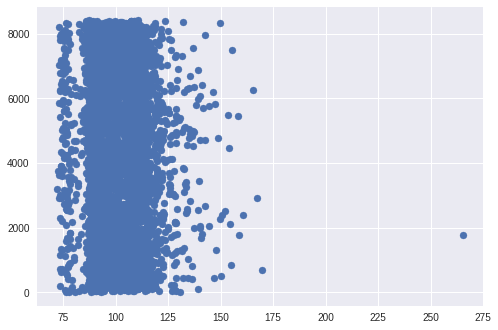

In [39]:
plt.scatter(train[target], train['ID'])
plt.show()

In [40]:
train = train[train.y < 250]

# Preprocessing

In [41]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from multiprocessing import Pool

import keras
from keras import backend as K
K.set_image_dim_ordering('tf')

In [42]:
X_train = train[features]
X_test = test[features]

y_train = train[target]

print(X_train.shape, X_test.shape)

(4208, 1170) (4209, 1170)


In [43]:
X_train.head()

,PCA_47,FA_88,X157,X363,X346,X47_log,X68,X44,X159,ICA_68,...,X58,X0_div_X315,X315_bool_2,tSVD_76,X128,SRP_38,X379,X8_div_X315,FA_40,GRP_79
0,0.411444,-8.991630e-09,0,0,0,0,1,0,0,0.013079,...,1,11847.582453,0,0.167641,1,0.000000,0,4482.869036,-3.592847,2.284541
1,0.129909,-8.731723e-01,0,1,0,0,0,0,0,-0.004688,...,0,11847.582453,0,0.059574,1,0.000000,0,4482.869036,0.284242,3.920923
2,0.230344,-7.696315e-01,1,1,0,0,1,0,0,-0.002129,...,1,7684.918348,0,0.464480,1,-1.393431,0,7364.713417,0.642937,-1.194240
3,0.258134,5.838793e-01,1,1,0,0,0,0,0,-0.015660,...,0,7684.918348,0,0.348891,1,-0.464477,0,1280.819725,0.153780,0.439125
4,0.305924,4.978845e-01,1,1,0,0,0,0,0,-0.000153,...,0,7684.918348,0,0.391258,1,-0.464477,0,4162.664105,0.017243,-4.805502


In [44]:
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train.as_matrix(), y_train.as_matrix(), test_size=0.1, random_state=SEED
# )

In [45]:
scaler = StandardScaler()

# # train_X = np.nan_to_num(train_X)
# # val_X = np.nan_to_num(val_X)
# # test_X = np.nan_to_num(test_X)

X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model

In [26]:
from sklearn.metrics import log_loss, auc, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

from keras.layers.advanced_activations import PReLU
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU

from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.layers import Merge, Conv1D, merge

from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, BatchNormalization, TimeDistributed, Input
from keras.layers import MaxPooling1D, Lambda, Convolution1D, Flatten, SpatialDropout1D
from keras_tqdm import TQDMNotebookCallback
from keras.layers.merge import Concatenate

from keras.optimizers import Adam, RMSprop, Adamax, Adagrad, Nadam, SGD
from keras.activations import elu, relu, tanh, sigmoid
from keras.constraints import maxnorm

from keras.models import load_model, Model
from keras.wrappers.scikit_learn import KerasRegressor

from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, VotingClassifier

from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor

import random
import xgboost as xgb

In [27]:
import six
import warnings
from keras.utils.generic_utils import deserialize_keras_object
from keras.engine import Layer
# -*- coding: utf-8 -*-
from __future__ import absolute_import

from keras.initializers import VarianceScaling, Initializer


class AlphaDropout(Layer):
    """Applies Alpha Dropout to the input.
    Alpha Dropout is a `Dropout` that keeps mean and variance of inputs
    to their original values, in order to ensure the self-normalizing property
    even after this dropout.
    Alpha Dropout fits well to Scaled Exponential Linear Units
    by randomly setting activations to the negative saturation value.
    # Arguments
        rate: float, drop probability (as with `Dropout`).
            The multiplicative noise will have
            standard deviation `sqrt(rate / (1 - rate))`.
        seed: A Python integer to use as random seed.
    # Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
    # Output shape
        Same shape as input.
    # References
        - [Self-Normalizing Neural Networks](https://arxiv.org/abs/1706.02515)
    """
    def __init__(self, rate, noise_shape=None, seed=None, **kwargs):
        super(AlphaDropout, self).__init__(**kwargs)
        self.rate = rate
        self.noise_shape = noise_shape
        self.seed = seed
        self.supports_masking = True

    def _get_noise_shape(self, inputs):
        return self.noise_shape if self.noise_shape else K.shape(inputs)

    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs(inputs=inputs, rate=self.rate, seed=self.seed):
                alpha = 1.6732632423543772848170429916717
                scale = 1.0507009873554804934193349852946
                alpha_p = -alpha * scale

                kept_idx = K.greater_equal(K.random_uniform(noise_shape, seed=seed), rate)
                kept_idx = K.cast(kept_idx, K.floatx())

                # Get affine transformation params
                a = ((1 - rate) * (1 + rate * alpha_p ** 2)) ** -0.5
                b = -a * alpha_p * rate

                # Apply mask
                x = inputs * kept_idx + alpha_p * (1 - kept_idx)

                # Do affine transformation
                return a * x + b

            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

    def get_config(self):
        config = {'rate': self.rate}
        base_config = super(AlphaDropout, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
    
def selu(x):
    """Scaled Exponential Linear Unit. (Klambauer et al., 2017)
    # Arguments
        x: A tensor or variable to compute the activation function for.
    # References
        - [Self-Normalizing Neural Networks](https://arxiv.org/abs/1706.02515)
    """
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale * K.elu(x, alpha)

def lecun_uniform(seed=None):
    """LeCun uniform initializer.
    It draws samples from a uniform distribution within [-limit, limit]
    where `limit` is `sqrt(3 / fan_in)`
    where `fan_in` is the number of input units in the weight tensor.
    # Arguments
        seed: A Python integer. Used to seed the random generator.
    # Returns
        An initializer.
    # References
        LeCun 98, Efficient Backprop,
        http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf
    """
    return VarianceScaling(scale=1.,
                           mode='fan_in',
                           distribution='uniform',
                           seed=seed)

In [28]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [29]:
from sklearn.utils import shuffle

class PseudoLabeler(object):
    
    def __init__(self, model, train, test, features, target, seed=42):
        '''
        Wrapper for sklearn models for pseudo labeling.
        '''
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.train = train
        self. test = test
        
        self.features = features
        self.target = target
        
    def fit(self, sample_rate=0.2, validation_split=0.1, verbose=0):
        '''
        Fit the data using pseudo labeling.
        
        @sample_rate - percent of samples from test set
        @validation_split - validation used to compare results
        
        Returns both R2 scores
        '''
        num_to_sample = int(len(X_train) * 0.2)
        
        if verbose == 1:
            print('train size: {}, test size: {}, sample size: {} '.format(
                len(self.train), len(self.test), num_to_sample)
            ) 
        
        train, validation = train_test_split(self.train, test_size=validation_split, random_state=self.seed)
        
        self.model.fit(train[self.features], train[self.target])
        y_pred = self.model.predict(validation[features])
        R2_raw_train = r2_score(validation[target], y_pred)
        
        augemented_train = self.__create_augmented_test(train, num_to_sample)
        self.model.fit(augemented_train[features], augemented_train[target])
        
        y_pred = self.model.predict(validation[features])
        R2_pseudo_train = r2_score(validation[target], y_pred)
        
        if verbose == 1:
            print('R2(with raw train set): %f' % R2_raw_train)
            print('R2(with pseudo train): %f' % R2_pseudo_train)
            
        return R2_raw_train, R2_pseudo_train
        

    def __create_augmented_test(self, train, num_of_samples):
        self.model.fit(
            train[self.features],
            train[self.target]
        )
        y_test = model.predict(self.test[self.features])
        
        augmented_test = test.copy(deep=True)
        augmented_test['y'] = y_test
        
        sampled_test = augmented_test.sample(n=num_of_samples)
        augemented_train = pd.concat([sampled_test, train])
        augmented_train = shuffle(augemented_train)
        return augmented_train
        
    def predict(self, x):
        '''
        Returns the predicted values.
        '''
        return self.model.predict(x)
    
    def get_model_name(self):
        return self.model.__class__.__name__

In [ ]:
model = XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print('R2:', r2_score(y_val, y_pred))
print('MSE:', mean_squared_error(y_val, y_pred))

In [51]:
models = [
#     XGBRegressor(
#         n_estimators=1500,
#         learning_rate=0.1,
#         min_child_weight=1.5,
#         max_depth=1,
#         gamma=0.0,
#         colsample_bytree=0.85,
#         subsample=1.0,
#         reg_alpha=96,
#         reg_lambda=5e-06,
#         seed=SEED,
#         nthread=1
#     ),
    BayesianRidge(
        compute_score=True,
        fit_intercept=True,
        normalize=False,
        alpha_1=0,
        alpha_2=0.01,
        lambda_1=15,
        lambda_2=0,
        tol=1e-06,
    ),
#     SVR(
#         kernel='rbf',
#         C=123,
#         gamma=3.0517578125e-05,
#         epsilon=0.072
#     ),
    NuSVR(
        nu=0.42,
        kernel='rbf',
        C=123,
        gamma=3.0517578125e-05,
    ) 
]
    
for model in models:
    print(model.__class__.__name__)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=8, n_jobs=8)
    print("R2: %0.5f (+/- %0.3f)\n" % (scores.mean(), scores.std() * 2))
 

# 90 componenets, scaled, without outlier, jittered 
# XGBRegressor
# R2: 0.38387 (+/- 0.655)

# BayesianRidge
# R2: 0.56411 (+/- 0.140)

# SVR
# R2: 0.54078 (+/- 0.187)

# NuSVR
# R2: 0.56475 (+/- 0.164)

BayesianRidge
R2: 0.58523 (+/- 0.094)

NuSVR
R2: 0.58773 (+/- 0.120)



In [ ]:
params = {
    'nu':[0.3, 0.33, 0.37, 0.41, 0.42, 0.45, 0.48]
}

model = GridSearchCV(
        NuSVR(
            nu=0.42,
            kernel='rbf',
            C=123,
            gamma=3.0517578125e-05,
        ),
        params,
        cv=3,
        n_jobs=8,
        verbose=3,
        scoring='r2'
)

model.fit(X_train, y_train)
print(model.best_params_, model.best_score_)

y_pred = model.predict(X_train)
print('R2 train:', r2_score(y_train, y_pred))
print('MSE train:', mean_squared_error(y_train, y_pred))

In [ ]:
# model.add(Dense(16, kernel_initializer=lecun_uniform()))
# model.add(Activation(selu))
# model.add(BatchNormalization())
# model.add(AlphaDropout(0.14))

model = Sequential()

model.add(Dense(500, input_dim=X_train.shape[1], kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.31))


model.add(Dense(1, activation='linear'))   

In [ ]:
model.compile(
    loss='mean_squared_error',
    optimizer=Nadam(0.0001, clipnorm=1.0),
    metrics=[R2]
)

model.fit(
    X_train, y_train,
    batch_size=512,
    epochs=222,
    validation_data = (X_val, y_val),
    verbose=0,
    callbacks=[TQDMNotebookCallback()] 
)

## Submission

In [52]:
# BayesianRidge(
#     compute_score=True,
#     fit_intercept=True,
#     normalize=False,
#     alpha_1=0,
#     alpha_2=0.01,
#     lambda_1=15,
#     lambda_2=0,
#     tol=1e-06,
# )

# NuSVR(
#     nu=0.42,
#     kernel='rbf',
#     C=123,
#     gamma=3.0517578125e-05,
# ) 

# SVR(
#     kernel='rbf',
#     C=123,
#     gamma=3.0517578125e-05,
#     epsilon=0.072
# )


model = BayesianRidge(
    compute_score=True,
    fit_intercept=True,
    normalize=False,
    alpha_1=0,
    alpha_2=0.01,
    lambda_1=15,
    lambda_2=0,
    tol=1e-06,
)
model.fit(X_train, y_train)

BayesianRidge(alpha_1=0, alpha_2=0.01, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=15, lambda_2=0, n_iter=300,
       normalize=False, tol=1e-06, verbose=False)

In [ ]:
try:
    X_test = X_test.as_matrix()
except Exception:
    pass

In [53]:
try:
    predictions = model.predict(X_test).ravel()
except:
    predictions = model.predict(dtest)

In [54]:
predictions

array([ 107.84015281,  117.33097904,  -33.6865338 , ...,   96.36667813,
        105.97474521,   91.85332402])

In [55]:
model_name = 'BR_CV5_R2_58523_no_outlier'
#model.save('../models/' + model_name + '.h5')

output = pd.DataFrame({'id': test['ID'].copy().values, 'y': predictions})
output.to_csv('../submissions/submission_' + model_name + '.csv', index=False)